# Cleaning and Graphing Data for Movie Analysis #

                       Importing and Evaluating Data

The  first thing to do is import all our libraries, then import all our dataframes we'll be using.

For this analysis, we'll be using pandas,numpy, seaborn, and matplotlib.
The three dataframes will be listed as df, movies, and popularity.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('bom.movie_gross.csv')
movies = pd.read_csv('imdb.title.basics.csv.gz')
popularity = pd.read_csv('tmdb.movies.csv.gz')

We'll start with the first dataframe 'df' and find out whatvalues are missing.  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I see that there are 3387 entries in our index, but some columns do not have all their values. For our analysis, we will be looking at the name of each movie, genre of movie, and a combined domestic gross and foreign gross, so I need to fill those values with something. Let's assume the movies these movies did not make any money foreign or domestic so I'll fill those empty values with zeros. 

In [24]:
values = {'domestic_gross': 0, 'foreign_gross': 0}

Then we want to fill those Na values back into our dataframe, 'df'.

In [25]:
df = df.fillna(value=values)

Now if we look back in our dataframe, we can see that foreign and domestic gross have all the values filled.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB



After looking through the data, I had movies in the billions that are represented as thousands of millions. In order to properly add our numbes together, I needed to change them to their proper billion dollar value. To do this I located each movie by their index, then changed their values.

In [27]:
df.at[1872, 'foreign_gross'] = 1131600000
df.at[1873, 'foreign_gross'] = 1019400000
df.at[1874, 'foreign_gross'] = 1163000000
df.at[2760, 'foreign_gross'] = 1010000000
df.at[3079, 'foreign_gross'] = 1369500000

After changing the values for these numbers, we need to change the foreign_gross type to an integer. I see from our info above it is classified as an 'object'. Python cannot add a 'float64' to an 'object'. I'll create a new column 'total_gross' that is a grand total of foreign_gross and domestic_gross, so I can wee exactly how much money each movie made.

In [28]:
df['foreign_gross'] = df['foreign_gross'].astype(int)
df['total_gross'] = df['foreign_gross'] + df['domestic_gross']

Now that I have my money total, I can drop unnecessary columns. Since I am only looking at total_gross and title, I can drop 'studio', 'year', 'domestic_gross', and 'foreign_gross'. 

In [29]:
df = df.drop(['studio', 'domestic_gross', 'foreign_gross', 'year'], axis = 1)

I want to organize my dataframe by the most amount of money a movie made. In order to do this, I'll change my 'df' to be organized this way.

In [30]:
df = df.nlargest(4000, columns = 'total_gross')
df

,title,total_gross
1872,Star Wars: The Force Awakens,2.068300e+09
3079,Avengers: Infinity War,2.048300e+09
1873,Jurassic World,1.671700e+09
727,Marvel's The Avengers,1.518900e+09
1874,Furious 7,1.516000e+09
...,...,...
3078,2:22,4.000000e+02
2756,News From Planet Mars,3.000000e+02
2757,Satanic,3.000000e+02
2321,The Chambermaid,3.000000e+02


Now let's look into our next dataframe, 'movies'. This one will tell us the worldwide popularity of each movie, giving it a core from 0-100.

In [31]:
movies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


We have a lot of unecessary columns like 'tconst', 'original_title', 'start_year', and 'runtime_minutes'. I'm more interested in the primary_title column because that's the name of the movie when it came out. So, I'm going to drop those irrelavent colummns. I'm going to need to merge this dataframe with my other dataframe. In order to do that, I'll rename the column 'primary_title' to 'title'. It looks like 'tconst' is an index for each movie and although it would be great to keep this, it will not match up with our other dataframes When we call on the dataframe, we'll see we only have the columns we need.

In [32]:
movies = movies.drop(columns = ['tconst','original_title', 'runtime_minutes', 'start_year'])
movies.rename(columns = {'primary_title':'title'}, inplace = True)

Now we want to merge the two dataframes. We will assign this dataframe the variable, 'two_tables'. We dont want

In [33]:
two_tables = pd.merge(df, movies, on = 'title', how = 'inner')

Now we'll explore our third dataframe, 'popularity'. This oe tells us one a global scale how popular each movie was. The more popular movies will be given a score closer to 100, where the less popular ones will be closer to 0.

In [34]:
popularity

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Again, I see I have unnecessary columns and need to drop those. I'll drop 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'release_date', 'vote_average', and 'vote_count'. 

In [35]:
popularity = popularity.drop(columns = ['Unnamed: 0','genre_ids','id','original_language','original_title','release_date','vote_average','vote_count'])
popularity

,popularity,title
0,33.533,Harry Potter and the Deathly Hallows: Part 1
1,28.734,How to Train Your Dragon
2,28.515,Iron Man 2
3,28.005,Toy Story
4,27.920,Inception
...,...,...
26512,0.600,Laboratory Conditions
26513,0.600,_EXHIBIT_84xxx_
26514,0.600,The Last One
26515,0.600,Trailer Made


Now I'll mege my 'two_tables' with 'popularity'. I'll merge again by title and we'll have our final dataframe. I'll call this dataframe 'combined_data'.

In [36]:
combined_data = pd.merge(two_tables, popularity, on = 'title', how = 'inner')
combined_data

,title,total_gross,genres,popularity
0,Avengers: Infinity War,2.048300e+09,"Action,Adventure,Sci-Fi",80.773
1,Jurassic World,1.671700e+09,"Action,Adventure,Sci-Fi",20.709
2,Furious 7,1.516000e+09,"Action,Crime,Thriller",20.396
3,Avengers: Age of Ultron,1.405400e+09,"Action,Adventure,Sci-Fi",44.383
4,Black Panther,1.347000e+09,"Action,Adventure,Sci-Fi",2.058
...,...,...,...,...
3767,Into the White,7.000000e+02,"Biography,Documentary",7.072
3768,Death of a Superhero,6.000000e+02,"Animation,Drama",5.158
3769,2:22,4.000000e+02,Thriller,11.316
3770,Satanic,3.000000e+02,Horror,6.403


So now we have our movie titles, how much money they made, genres, and how popular they were. We have everything we need all in one table.

When I look through my dataframe, I can see I have duplicate movies. This can skew the data in any direction, so I need to get rid of those.

To do this I'll tell python to look for duplicates in the title and keep the last entry.

In [37]:
combined_data['title'] = combined_data.title.drop_duplicates(keep = 'last')
combined_data = combined_data.dropna(subset = ['title'], axis = 0, how = 'any')

In [38]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 3771
Data columns (total 4 columns):
title          2209 non-null object
total_gross    2209 non-null float64
genres         2193 non-null object
popularity     2209 non-null float64
dtypes: float64(2), object(2)
memory usage: 86.3+ KB


Now I have 2209 entries and all of our columns meet my needs except genre. I want to make sure each movie has a genre, so I'll check to for null values and see 'genre' does in fact have some null values. 

In [39]:
combined_data.isna().any()

title          False
total_gross    False
genres          True
popularity     False
dtype: bool

Now I want to see exactly what movies do not have a genre. 

In [40]:
combined_data.loc[combined_data['genres'].isnull()]

,title,total_gross,genres,popularity
62,Inside Out,857600000.0,NaN,24.797
304,Oblivion,286200000.0,NaN,18.534
553,Flight,161800000.0,NaN,11.692
643,The Bounty Hunter,136399999.0,NaN,9.861
661,Unknown,130799999.0,NaN,12.080
752,Transcendence,103000000.0,NaN,11.035
1280,Going the Distance,42000000.0,NaN,8.281
1411,When the Bough Breaks,30611000.0,NaN,8.062
1797,Strange Magic,13600000.0,NaN,6.937
2049,Believe,6200000.0,NaN,1.536


There aren't too many movies that do not have a genre, so I looked them up and added a genre to each.


In [41]:
altered_genres = combined_data.at[304, 'genres'] = 'Action, Sci-Fi'
combined_data.at[3240, 'genres'] = 'Comedy'
combined_data.at[3093, 'genres'] = 'Drama'
combined_data.at[2618, 'genres'] = 'Drama, Romance'
combined_data.at[2388, 'genres'] = 'Crime, Drama'
combined_data.at[2347, 'genres'] = 'Drama, Thriller'
combined_data.at[2182, 'genres'] = 'Drama, Thriller'
combined_data.at[2049, 'genres'] = 'Drama'
combined_data.at[1797, 'genres'] = 'Animation, Family'
combined_data.at[1411, 'genres'] = 'Drama, Horror'
combined_data.at[1280, 'genres'] = 'Comedy, Romance'
combined_data.at[752, 'genres'] = 'Action, Sci-Fi'
combined_data.at[661, 'genres'] = 'Action, Thriller'
combined_data.at[643, 'genres'] = 'Comedy, Romance'
combined_data.at[553, 'genres'] = 'Thriller, Drama'
combined_data.at[62, 'genres'] = 'Animation, Comedy'

In [42]:
combined_data.isna().any()

title          False
total_gross    False
genres         False
popularity     False
dtype: bool

I don't like how my movies have more than one genre, so I'll make a for loop that iterates through each movie and seperates the genres so I get one word describing the movie.

In [43]:
u = str(set(list(combined_data['genres'])))
u.count('Adventure')
combined_data["genres"]= combined_data["genres"].str.split(",", n = 1, expand = True)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
combined_data

,title,total_gross,genres,popularity
0,Avengers: Infinity War,2.048300e+09,Action,80.773
1,Jurassic World,1.671700e+09,Action,20.709
2,Furious 7,1.516000e+09,Action,20.396
3,Avengers: Age of Ultron,1.405400e+09,Action,44.383
5,Black Panther,1.347000e+09,Action,44.140
...,...,...,...,...
3767,Into the White,7.000000e+02,Biography,7.072
3768,Death of a Superhero,6.000000e+02,Animation,5.158
3769,2:22,4.000000e+02,Thriller,11.316
3770,Satanic,3.000000e+02,Horror,6.403


So now I only have one genre for each movie.

The next step is to graph our data. I want to compare genres with popularity and total_gross with popularity.

But first I want to scale our total_gross into a value more readable. I'll divide each movies total by 10,000. I'll make sure python can do this by changing the 'total_gross' type to an int. Then we'll change 'total_gross' to total_gross_in_ten_thousands's.

In [45]:
combined_data['total_gross'] = combined_data['total_gross'].map(lambda x: int(x))
combined_data['total_gross'] = combined_data['total_gross'].map(lambda x: x / 10000)
combined_data=combined_data.rename(columns = {'total_gross': "total_gross_in_ten_thousands's"})

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
combined_data

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.00,Action,80.773
1,Jurassic World,167170.00,Action,20.709
2,Furious 7,151600.00,Action,20.396
3,Avengers: Age of Ultron,140540.00,Action,44.383
5,Black Panther,134700.00,Action,44.140
...,...,...,...,...
3767,Into the White,0.07,Biography,7.072
3768,Death of a Superhero,0.06,Animation,5.158
3769,2:22,0.04,Thriller,11.316
3770,Satanic,0.03,Horror,6.403


Now I can graph pur data. I want to compare popularity with total and popularity with genre.


Text(0, 0.5, 'Genres')

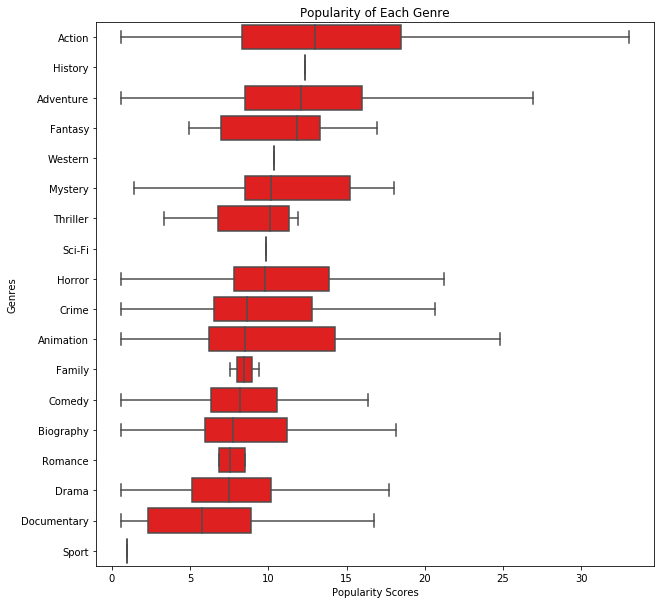

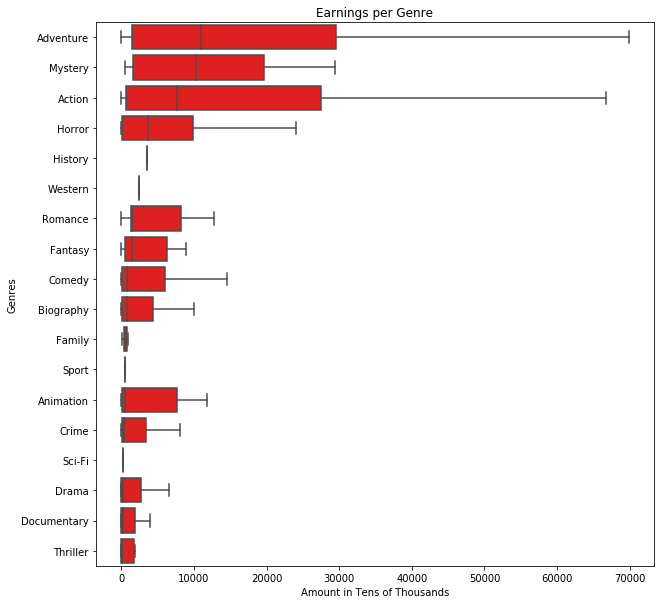

In [47]:
# graph 1
my_order = combined_data.groupby(by=["genres"])[
    "popularity"].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
sns.boxplot(x='popularity', y='genres', order=my_order, data=combined_data.nlargest(
    4000, 'popularity'), color='r', showfliers=False)
plt.title("Popularity of Each Genre")
plt.xlabel("Popularity Scores")
plt.ylabel("Genres")

# graph 2
my_order2 = combined_data.groupby(by=["genres"])[
    "total_gross_in_ten_thousands's"].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
sns.boxplot(x="total_gross_in_ten_thousands's", y='genres', order=my_order2, data=combined_data.nlargest(
    4000, "total_gross_in_ten_thousands's"), color='r', showfliers=False)
plt.title("Earnings per Genre")
plt.xlabel("Amount in Tens of Thousands")
plt.ylabel("Genres")